<a href="https://colab.research.google.com/github/kdmwangi/Data-Science/blob/main/Heart_Attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data set explanation:

Independent Variables:

Age : Age of the patient

Sex : Sex of the patient

cp : Chest Pain type chest pain type

Value 1: typical angina

Value 2: atypical angina

Value 3: non-anginal pain

Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal

Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

exng: exercise induced angina (1 = yes; 0 = no)

oldpeak: Previous peak

slp: Slope

caa: number of major vessels (0-3)

thall: Thal rate

Dependent Variable:

target:

0 = less chance of heart attack

1= more chance of heart attack

Import Statements

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

%pip install black
%pip install "black[']"
%matplotlib inline

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Read Data

In [5]:
dataset = pd.read_csv('Heart Attack Analysis & Prediction Dataset.csv')

# Data Exploration

In [6]:
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
dataset.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [11]:
dataset.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
dataset.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [14]:
dataset.shape

(303, 14)

In [16]:
print(f"The dataset has {dataset.shape[1]} columns and {dataset.shape[0]} rows")

The dataset has 14 columns and 303 rows


In [18]:
# data type of the columns
dataset.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [19]:
# oldest patient
dataset['age'].max()

77

In [20]:
# youngest patient in the dataset
dataset['age'].min()

29

In [25]:
# distribution of gender in the dataset
dataset['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [28]:
# highest cholestrol reading and lowest
print(f"highest cholestrol {dataset['chol'].max()} mg/dl  and lowest cholestrol is {dataset['chol'].min()} mg/dl")

highest cholestrol 564 mg/dl  and lowest cholestrol is 126 mg/dl


In [30]:
# highest thalach : maximum heart rate achieved and lowest
print(f"highest thalach {dataset['thalachh'].max()} and lowest thalach {dataset['thalachh'].min()}")

highest thalach 202 and lowest thalach 71


In [31]:
# highest and lowest resting blood sugar trtbps : resting blood pressure (in mm Hg)
print(f"highest resting blood sugar {dataset['trtbps'].max()} and lowest resting blood sugar {dataset['trtbps'].min()}")

highest resting blood sugar 200 and lowest resting blood sugar 94


In [37]:
# distribution of the target variable in the dataset
dataset['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [ ]:
# all the columns have been label encoded


# Data Visualization

[Text(0.5, 1.0, 'Gender number of patients')]

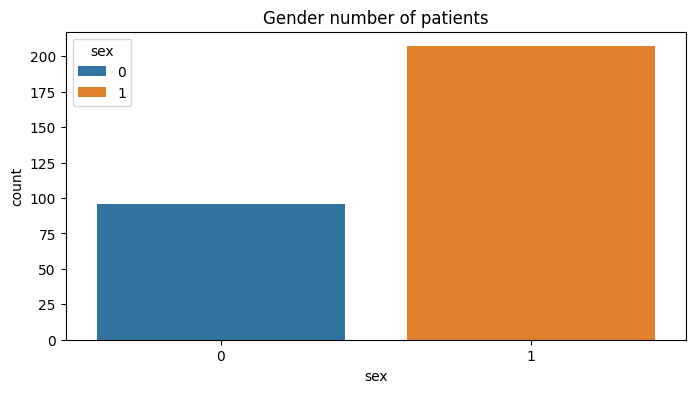

In [35]:
plt.figure(figsize=(8,4))
fig = sns.countplot(dataset, x='sex', hue='sex')
fig.set(title="Gender number of patients")

<Axes: xlabel='output', ylabel='count'>

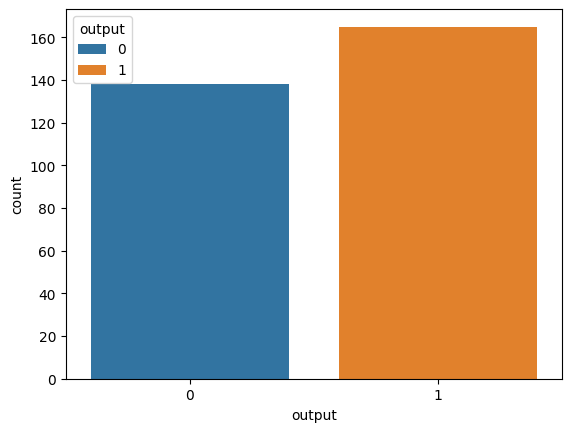

In [36]:
# its not an imbalanced dataset
sns.countplot(dataset, x='output', hue='output')

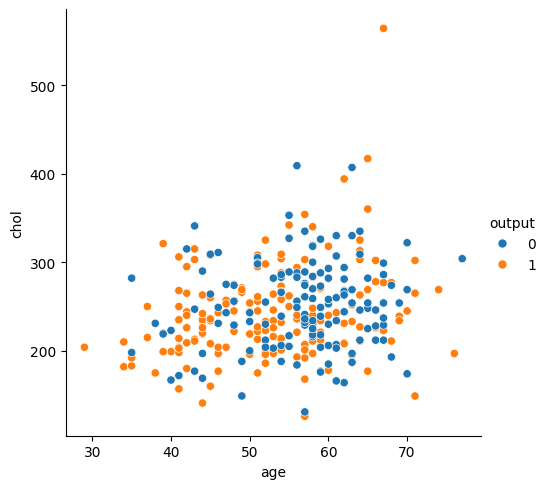

In [39]:
# draw a rel plot of cholestrol vs age
# trying to explain the chance of having a heart attack
sns.relplot(dataset, x='age' ,y='chol', hue='output')

<Axes: xlabel='sex', ylabel='count'>

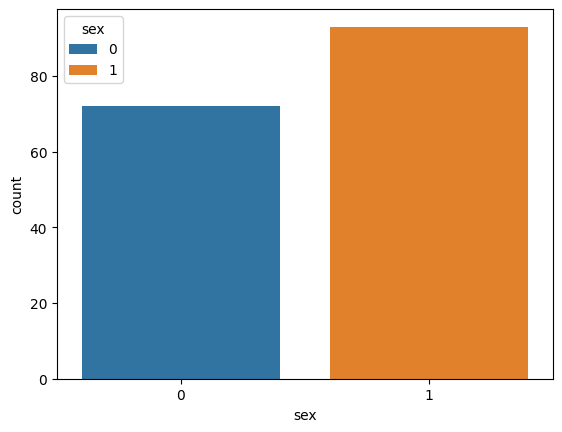

In [40]:
# explain which gender has a higher heart attack
data =  dataset[dataset['output'] == 1]
sns.countplot(data, x='sex', hue='sex')

<Axes: xlabel='trtbps', ylabel='thalachh'>

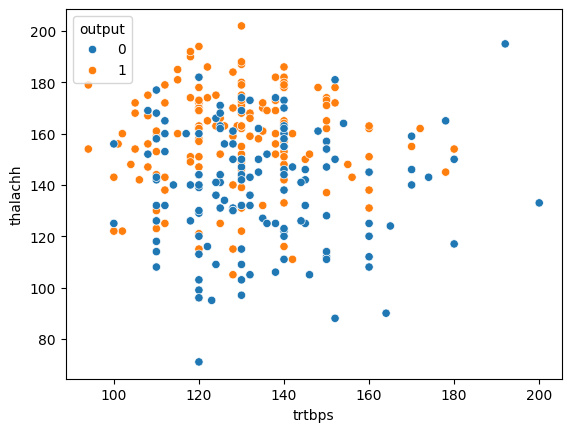

In [42]:
sns.scatterplot(dataset,x='trtbps', y='thalachh', hue='output')